In [44]:
from globox import AnnotationSet
import glob
import cv2
import json
import matplotlib.pyplot as plt
import os
import numpy as np

In [19]:
yolo = AnnotationSet.from_yolo_v5(
    folder="../data/train/labels/train/",
    image_folder="../data/train/images/train/",
    image_extension=".png"
)
yolo

AnnotationSet(annotations: {'syn_00000.png': Annotation(image_id: syn_00000.png, image_size: (1920, 1040), boxes: [BoundingBox(label: 9, xmin: 1037.0, ymin: 209.0, xmax: 1312.0, ymax: 448.0, confidence: None), BoundingBox(label: 25, xmin: 803.9999999999999, ymin: 425.0, xmax: 1127.0, ymax: 783.0, confidence: None), BoundingBox(label: 12, xmin: 330.0, ymin: 250.0, xmax: 583.0, ymax: 511.0, confidence: None)]), 'syn_00001.png': Annotation(image_id: syn_00001.png, image_size: (1920, 1040), boxes: [BoundingBox(label: 16, xmin: 1000.0, ymin: 98.0, xmax: 1295.0, ymax: 405.0, confidence: None), BoundingBox(label: 14, xmin: 678.0, ymin: 175.0, xmax: 926.0, ymax: 421.0, confidence: None), BoundingBox(label: 31, xmin: 427.0, ymin: 560.0, xmax: 709.0, ymax: 864.0, confidence: None)]), 'syn_00002.png': Annotation(image_id: syn_00002.png, image_size: (1920, 1040), boxes: [BoundingBox(label: 4, xmin: 1108.0, ymin: 313.0, xmax: 1391.0, ymax: 616.0, confidence: None), BoundingBox(label: 2, xmin: 705.0

In [9]:
with open('../data/classes.txt', 'r') as f:
    data = f.read()
    
data = data.split('\n')
name_classes = [d.split(',')[1] for d in data if len(d) > 0]

In [20]:
yolo.save_labelme(
    save_dir='../coco/',
)

In [24]:
json_file_list = glob.glob('../labelme/*.json')
root_images = '../data/train/images/train/'

In [36]:
def crop_image(image, path_save, xmin, ymin, xmax, ymax):
    print(image.shape)
    cropped_image = image[ymin:ymax, xmin:xmax, :]
    cv2.imwrite(path_save, cropped_image)

In [38]:
image[3:5, 6:7, :]

array([[[99, 74, 54]],

       [[87, 74, 52]]], dtype=uint8)

In [32]:
for i in range(34):
    os.mkdir('../crop/train/' + str(i))

In [40]:
for p in json_file_list:
    with open(p, 'r') as f:
        data = json.load(f)
    
    p_img = data['imagePath']
    name = p_img.split('.')[0]
    image = cv2.imread(root_images + p_img)
    boxs = data['shapes']
    for bb in boxs:
        label = bb['label']
        points = bb['points']
        xmin, ymin = [int(a) for a in points[0]]
        xmax, ymax = [int(a) for a in points[1]]

        path_save = '../crop/train/' + label + '/' + name + '_' + label + '.png'
        crop_image(image, path_save, xmin, ymin, xmax, ymax)


(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1920, 3)
(1040, 1

In [28]:
xmin, ymin, xmax, ymax = 1037, 209, 1312, 448

img = cv2.imread(root_images + 'syn_00000.png')

img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)

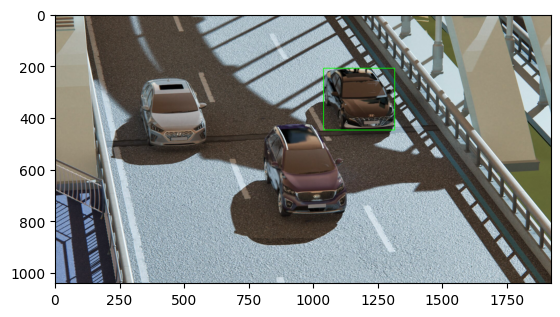

In [30]:
plt.imshow(img)

In [41]:
for i in range(34):
    os.mkdir('../crop/validation/' + str(i))

In [49]:
for i in range(34):
    list_file = glob.glob('../crop/train/'+str(i)+"/*.png")
    num_rand = np.random.choice(len(list_file), int(0.1 * len(list_file)), replace=False)
    
    get_file = [list_file[i] for i in num_rand]